 # Analysis of NEISS Data 
 
 <p>  This notebook provides detailed information, including the code, on analysis of NEISS data. 

In [1]:
# import relevant packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

## 1. Data Exploration & Preparation

<p> Step to merge all supporting data provided to get meaningful description for the fields such as <b>code </b> </p>

In [2]:
# Read csv files
neiss_2014 = pd.read_csv("./data/NEISS2014.csv")
body_parts = pd.read_csv("./data/BodyParts.csv")
diagnosis = pd.read_csv("./data/DiagnosisCodes.csv")
disposition = pd.read_csv("./data/Disposition.csv")

### Explore Data 

In [3]:
# explore NEISS key data 
print(neiss_2014.head())

   CPSC Case # trmt_date  psu  weight stratum  age     sex         race  \
0    141200216  10/23/14   63  99.704       M   21  Female  None listed   
1    140117851    1/4/14   63  81.576       M   62  Female        White   
2    150144993   8/17/14   63  99.704       M   21  Female  None listed   
3    150230176   7/27/14   63  99.704       M   30  Female  None listed   
4    141220717    9/8/14   63  99.704       M   16    Male  None listed   

  race_other  diag diag_other  body_part  disposition  location  fmv  prod1  \
0        NaN    62        NaN         75            1         1    0    679   
1        NaN    57        NaN         79            1         1    0   1807   
2        NaN    57        NaN         83            1         0    0   1333   
3        NaN    64        NaN         79            1         1    0   4076   
4        NaN    57        NaN         82            1         0    0   1893   

    prod2                                          narrative  
0  1807.0  

In [4]:
# Total number of records in NEISS dataframe  
neiss_row_count = neiss_2014.shape[0]
print("Total number of records in NEISS data:", neiss_row_count)

neiss_unique_cases = len(neiss_2014['CPSC Case #'].unique().tolist())
print("Unique cases:", neiss_row_count)


Total number of records in NEISS data: 65499
Unique cases: 65499


<p> Apparently every row in NEISS dataframe represent a unique case </p>

In [5]:
# explore body_parts  
body_parts.head()

,BodyPart,Code
0,"Arm, lower",33
1,"Arm, upper",80
2,Ankle,37
3,Ear,94
4,Elbow,32


In [6]:
# explore diagnosis by code  
diagnosis.head()

,Diagnosis,Code
0,Amputation,50
1,Anoxia,65
2,Aspirated foreign object,42
3,Avulsion,72
4,"Burns, scald (from hot liquids or steam)",48


In [7]:
# explore Disposition by code  
disposition.head()

,Disposition,Code
0,"Treated and released, or examined and released...",1
1,Treated and transferred to another hospital,2
2,Treated and admitted for hospitalization (with...,4
3,Held for observation (includes admitted for ob...,5
4,Left without being seen/Left against medical a...,6


### Merge Data
<p> Apparently we will have to map the codes in the NEISS data to get meaningful description </p>

####  Codes to map
<p>
<li> Field <b> body_part </b> from NEISS2014  can be joined with relevant field <b> Code </b> from BodyParts.csv </li>
<li> Field <b> diag </b> from NEISS2014  can be joined with relevant field <b> Code </b> from DiagnosisCodes.csv </li>
<li> Field <b> disposition </b> from NEISS2014  can be joined with relevant field <b> Code </b> from Disposition.csv </li>


In [8]:
# rename column BodyPart from data body_parts 

body_parts.rename(columns={"BodyPart": "body_part_name"}, inplace=True)

# merge with NEISS data to get body_part_name
neiss_2014 = pd.merge(neiss_2014, 
                  body_parts,
                  left_on='body_part',
                  right_on='Code',
                  how='left')

# Drop the column Code from merged table as it is not needed 
neiss_2014 = neiss_2014.drop('Code', 1)

In [9]:
# rename column Diagnosis from diagnosis data 

diagnosis.rename(columns={"Diagnosis": "diagnosis_name"}, inplace=True)

# merge with NEISS data to get relevant name of the diagnosis 
neiss_2014 = pd.merge(neiss_2014, 
                  diagnosis,
                  left_on='diag',
                  right_on='Code',
                  how='left')

# Drop the column Code from merged table as it is not needed 
neiss_2014 = neiss_2014.drop('Code', 1)

In [10]:
# rename column Disposition from disposition

disposition.rename(columns={"Disposition": "disposition_name"}, inplace=True)

# merge with NEISS data to get body_part_name
neiss_2014 = pd.merge(neiss_2014, 
                  disposition,
                  left_on='disposition',
                  right_on='Code',
                  how='left')

# Drop the column Code from merged table as it is not needed 
neiss_2014 = neiss_2014.drop('Code', 1)

In [11]:
# Quickly Check if we have all columns needed to analyse the data further 
neiss_2014.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,...,body_part,disposition,location,fmv,prod1,prod2,narrative,body_part_name,diagnosis_name,disposition_name
0,141200216,10/23/14,63,99.704,M,21,Female,None listed,NaN,62,...,75,1,1,0,679,1807.0,21YOF LAYING ON THE COUCH AND ROLLED OFF TO TH...,Head,Internal organ injury,"Treated and released, or examined and released..."
1,140117851,1/4/14,63,81.576,M,62,Female,White,NaN,57,...,79,1,1,0,1807,115.0,62YOF TRIPPED OVER THE CORD FOR THE VACUUM CLE...,"Trunk, lower",Fracture,"Treated and released, or examined and released..."
2,150144993,8/17/14,63,99.704,M,21,Female,None listed,NaN,57,...,83,1,0,0,1333,NaN,21YOF FELL OFF A SKATEBOARD AND FRACTURED FOOT,Foot,Fracture,"Treated and released, or examined and released..."
3,150230176,7/27/14,63,99.704,M,30,Female,None listed,NaN,64,...,79,1,1,0,4076,NaN,30YOF TRYING TO GET OUT OF BED AND FELT A POP ...,"Trunk, lower",Strain or Sprain,"Treated and released, or examined and released..."
4,141220717,9/8/14,63,99.704,M,16,Male,None listed,NaN,57,...,82,1,0,0,1893,NaN,16YOM HAD HAND SLAMMED IN A DOOR FRACTURED HAND,Hand,Fracture,"Treated and released, or examined and released..."


<br>
## 2. Data Analysis

<p> Analyse the prepared data and answer specific questions </p>

### Question 1

#### (A) What are the top three body parts most frequently represented in this dataset?

In [12]:
# Top body parts by frequency in the dataset not restricting to 3
top_body_parts = neiss_2014['body_part_name'].value_counts().nlargest(5)  
print("Top Body Parts:\n")
print(top_body_parts)

Top Body Parts:

Head            9891
Face            5786
Finger          5783
Trunk, lower    5717
Trunk, upper    3868
Name: body_part_name, dtype: int64


#### <u>Result: </u> 
<p>From the above analysis, we can infer that the top three body parts most frequently represented in the dataset are </p> 

<b>
1. Head 
2. Face
3. Finger 


#### (B) What are the top three body parts that are least frequently represented?

In [13]:
# bottom 'n' body parts by frequency in the dataset 
bottom_body_parts = neiss_2014['body_part_name'].value_counts().nsmallest(6)
print("Bottom Body Parts:\n")
print(bottom_body_parts)

Bottom Body Parts:

25-50% of body      4
Pubic region      286
Not Recorded      390
Internal          549
Arm, upper        745
Leg, upper        756
Name: body_part_name, dtype: int64


#### <u>Result: </u> 

<b> Scenario 1: </b> Counting as it is 
<p> If we count the frequency of body part as it is then the following are the top body parts least frequently represented </p> 

1. 25-50% of body  
2. Pubic region
3. Not Recorded  

<b> Scenario 2: </b> Excluding unrecorded data

<p> If we exclude the records that does not have any body part associated with it then </p> 

1. 25-50% of body  
2. Pubic region
3. Internal  
    * use with aspiration and ingestion 
    
 
<b> Scenario 3: </b> Excluding unrecorded data and injury that affects more than one body part (mainly with severe injuries) 

<p> Here we only consider mostly the individual body part. Please refer Appendix D in NEISS manual for more details </p> 

1. Pubic region
2. Arm, upper
3. Leg, upper 
      

### Question 2

#### (A) How many injuries in this dataset involve a skateboard?

In [14]:
# Count of narratives that had words such as skateboard, skate board, skate boarding
# words associated with skateboard related injuries
# making the search case insensitive 
skateboard_condition = neiss_2014.narrative.str.contains(r'SKATEBOARD|SKATE BOARD', case=False)
total_skateboard_injuries = skateboard_condition.sum()

#### <u>Result: </u> 

<p> <b> Note: </b> We are not restricting our search to just "SKATEBOARD" rather also look for other relevant key words like SKATE BOARD </b>

In [15]:
print("Total Skateboard related injuries identified from narrative/description of the injuriy:\n ")
print(total_skateboard_injuries)

Total Skateboard related injuries identified from narrative/description of the injuriy:
 
472


#### (B) Of those injuries, what percentage were male and what percentage were female?

In [16]:
# check distinct values for the column sex to ensure we don't miss out rows due to slight variation in text 
unique_sex_values = neiss_2014['sex'].unique().tolist()
print(unique_sex_values)


['Female', 'Male']


In [17]:
# Total female skateboard injuries 
female_skateboard_injuries = ((neiss_2014['sex'] == 'Female') & (skateboard_condition == True)).sum()

# % of skateboard related injuries that were female 
percent_female = "{:.2%}".format(female_skateboard_injuries/total_skateboard_injuries)

# Total male skateboard injuries 
male_skateboard_injuries = ((neiss_2014['sex'] == 'Male') & (skateboard_condition == True)).sum()

# % of skateboard related injuries that were male 
percent_male = "{:.2%}".format(male_skateboard_injuries/total_skateboard_injuries)

#### <u>Result: </u> 

<p> Percentage of skateboard related injuries that were male and female </p>


In [18]:
print("Female: ", percent_female)
print("Male: ", percent_male)

Female:  17.37%
Male:  82.63%


#### (C) What was the average age of someone injured in an incident involving a skateboard?


In [19]:
# check distinct values for the age column to ensure we don't miss out rows due to slight variation in text 
unique_age_values = neiss_2014['age'].unique().tolist()
print(unique_age_values)

[21, 62, 30, 16, 22, 92, 89, 75, 68, 5, 91, 72, 31, 17, 53, 36, 64, 28, 6, 7, 79, 55, 58, 70, 13, 65, 87, 45, 2, 11, 69, 27, 213, 14, 8, 95, 77, 52, 48, 43, 84, 97, 4, 12, 63, 42, 74, 61, 73, 29, 80, 19, 203, 51, 10, 56, 217, 44, 204, 94, 18, 34, 26, 81, 46, 38, 25, 78, 37, 15, 222, 59, 90, 41, 9, 23, 54, 35, 20, 83, 47, 33, 71, 24, 82, 223, 3, 215, 76, 88, 212, 216, 219, 210, 32, 57, 60, 40, 220, 39, 85, 50, 67, 208, 49, 86, 99, 214, 211, 201, 93, 66, 98, 209, 221, 207, 96, 101, 206, 218, 205, 202, 105, 102, 0, 100, 103]


<p> There are values above 200 which prompted me to check the manual; NEISS manual showed the age is recorded in <b> years </b> for patients who are <b> 2 years and above </b> otherwise it is recorded in terms of months with 2 prefixed to show that age is in months</p>

<img src="./data/age_code.png">

In [20]:
# create a new column called age_in_years that shows all age in terms of years
# 1 month = 0.083333 years 

neiss_2014['age_in_years'] = np.where(neiss_2014['age'] >=200,round((neiss_2014['age']-200)*0.083333,2),\
                                      neiss_2014['age'])


In [21]:
# Average age of someone injuried in an incident involving a skateboard in terms of mean 
mean_age = neiss_2014[skateboard_condition==True].mean()['age_in_years']

In [22]:
# Average age of someone injuried in an incident involving a skateboard in terms of median 
median_age = neiss_2014[skateboard_condition==True].median()['age_in_years']

#### <u>Result: </u> 

<p> Average age of someone injuried in an incident involving a skateboard </p>


In [23]:
print("Mean: ", int(round(mean_age,1)), "years")
print("Median: ",int(round(median_age,1)), "years")

Mean:  18 years
Median:  16 years


### Question 3

#### (A) What diagnosis had the highest hospitalization rate? 

<p> Hospitalization rate is calculated as number of hospital inpatient discharges in particular group divided by the population in that group * 1000. In our case group can be diagnosis. </p>

<p> <b>Definition Source: </b> http://www.communityview.ca/Catalogue/Indicator/Definition/202 </p>


In [24]:
# Let us first explore the different disposition information we have

unique_disposition = disposition['disposition_name'].unique().tolist()
unique_disposition

['Treated and released, or examined and released\n without treatment',
 'Treated and transferred to another hospital',
 'Treated and admitted for hospitalization (within same facility)',
 'Held for observation (includes admitted for observation)',
 'Left without being seen/Left against medical advice',
 'Fatality, including DOA, died in the ED',
 'Not Recorded']

<p> Clearly, we will have to consider the disposition value <b>"Treated and admitted for hospitalization (within same facility)" </b>to calculate the hospitalization rate </p>

In [25]:
# total cases by diagnosis 
diagnosis_total =  neiss_2014.groupby('diagnosis_name')['diagnosis_name'].agg(['size']).rename(columns={'size': 'total_population'})

# cases hospitalized by diagnosis  
diagnosis_hospitalized = neiss_2014[(neiss_2014['disposition_name']=='Treated and admitted for hospitalization (within same facility)')]
diagnosis_hospitalized = diagnosis_hospitalized.groupby('diagnosis_name')['diagnosis_name'].agg(['size']).rename(columns={'size': 'total_hospitalized'})

# merge total cases and cases hospitalized to calculate hospitalization rate by diagnosis 
# hospitalization_Rate = total cases hospitalized / total cases 

hospitalization_data = pd.concat([diagnosis_total, diagnosis_hospitalized], axis=1)
hospitalization_data['hospitalization_rate (%)'] = round(hospitalization_data['total_hospitalized']/hospitalization_data['total_population'] * 100,2)
hospitalization_data = hospitalization_data.sort_values(by='hospitalization_rate (%)', ascending=False)

# view the top diagnosis by hospitalization rate 
hospitalization_data.head(10)

,total_population,total_hospitalized,hospitalization_rate (%)
Submersion (including Drowning),54,23.0,42.59
Fracture,9735,1811.0,18.60
Amputation,125,20.0,16.00
Poisoning,724,88.0,12.15
Internal organ injury,5306,630.0,11.87
Ingested foreign object,483,56.0,11.59
"Burns, not specified",19,2.0,10.53
Electric shock,32,3.0,9.38
Nerve damage,198,17.0,8.59
Hematoma,534,42.0,7.87


#### <u>Result: </u> 

<p> We can infer from the above table that <b> Submersion (including Drowning) </b> had highest hospitalization rate however the number of cases is very low. This is followed by <b> Fracture </b> with significant number of cases and also high hospitalization rate.
</p>
<br>


#### (B) What diagnosis most often concluded with the individual leaving without being seen?


In [26]:
# cases left without being seen by diagnosis  
diagnosis_not_seen = neiss_2014[(neiss_2014['disposition_name']==\
                                    'Left without being seen/Left against medical advice')]
diagnosis_not_seen = diagnosis_not_seen.groupby('diagnosis_name')['diagnosis_name'].\
                            agg(['size']).rename(columns={'size': 'total_not_seen'})

# merge total cases and cases left without being seen to calculate rate by diagnosis 

not_seen_data = pd.concat([diagnosis_total, diagnosis_not_seen], axis=1)
not_seen_data['not_seen_rate (%)'] = round(not_seen_data['total_not_seen']/not_seen_data['total_population'] * 100,2)
not_seen_data = not_seen_data.sort_values(by='not_seen_rate (%)', ascending=False)

# view top diagnosis 
not_seen_data.head(10)

,total_population,total_not_seen,not_seen_rate (%)
Poisoning,724,24.0,3.31
Other/Not Stated,8120,257.0,3.17
Aspirated foreign object,66,2.0,3.03
"Burns, radiation (includes all cell damage by ultraviolet, x- rays, microwaves, laser beam, radioactive materials, etc.)",35,1.0,2.86
"Burns, chemical (caustics, etc.)",86,2.0,2.33
Hematoma,534,12.0,2.25
"Burns, thermal (from flames or hot surface)",512,10.0,1.95
Anoxia,170,3.0,1.76
Amputation,125,2.0,1.60
Dental injury,251,4.0,1.59


#### <u>Result: </u> 

<p> We can infer from the above table that <b> Poisoning </b> most often concluded with individual leaving without being seen. Interestingly, there were also significant number of cases <b> without any diagnosis stated </b> but left without being seen. 
</p>
<br>


#### (C) Briefly discuss your findings and any caveats you'd mention when discussing this data


In [27]:
# cases with diagnosis of value other or not stated  

diagnosis_not_stated = ((neiss_2014['diag'] == 71).sum() / neiss_unique_cases)* 100

print(" % of cases with diagnosis not stated or marked as other: ", round(diagnosis_not_stated,2))

 % of cases with diagnosis not stated or marked as other:  12.4


#### <u>Findings/Discussion: </u> <br>

<li> Although Submersion had highest hospitalization rate, it is the diagnosis <b> Fracture </b> that had significant number of cases to consider as well as high hospitalization rate (18.6%) after submersion. </li>

<li> Interestingly <b> Poisoning </b> had very high hospitalization rate (12.15%) as well ranked the highest amongst  the diagnosis where individual left without being seen 

<li> Diagnosis were not stated or recorded as other for significant number of cases, i.e., about <b>12.4%</b> cases. This can be identified as 71 from diagnosis code column. However there are some textual information available for those cases which can be tricky to analyze. 

<li> Age is not recorded with consistent unit, for example, individual below 2 years are recorded in terms of week and indeed is a coded value. This could potentially skew the data if the age field is not transformed; therefore it is highly recommended to convert the age in weeks to years automatically when the data is entered. 

<li> I would also be interested in exploring the underlying products causing the injuries provided more information available to map the product code to specific product. 


### Question 4

#### Visualize any existing relationship between age and reported injuries

<b> <u> Age Group: </u></b>

<li> 0 to 2 - Infant
<Li> 3 to 14 - Children
<li> 15 to 24 - Youth
<li> 25 to 64 - Adults
<li> 65+ - Seniors



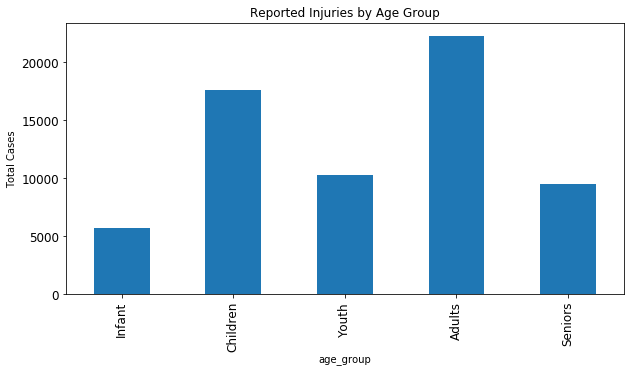

In [28]:
# Provide meaningful group to age 

neiss_2014['age_group'] = pd.cut(neiss_2014['age_in_years'], [0, 2, 14, 24, 64,150]\
                                 ,labels=['Infant', 'Children', 'Youth', 'Adults', 'Seniors'])

# reported cases by age group 
by_age_group =  neiss_2014.groupby('age_group')['age_group'].agg(['size']).rename(columns={'size': 'total_cases'})

# adding column to show in terms of percentage of total 
by_age_group['percent_total'] = round((by_age_group['total_cases']/neiss_unique_cases)*100,2)


# slightly increase size of font 
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)

# define label and titles 
plt.title('Reported Injuries by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Cases')

by_age_group['total_cases'].plot.bar(figsize=(10,5)) 
plt.show()


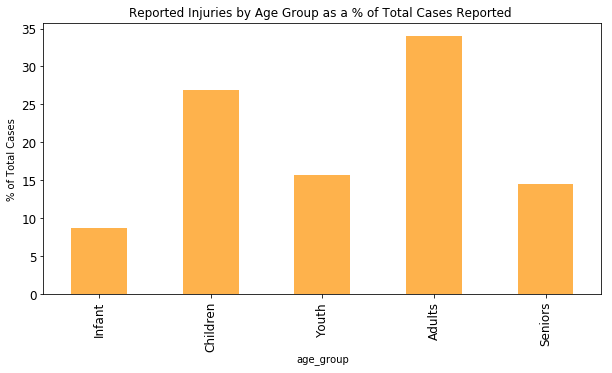

In [29]:
# define label and titles 
plt.title('Reported Injuries by Age Group as a % of Total Cases Reported ')
plt.xlabel('Age Group')
plt.ylabel('% of Total Cases')

# reported injuries as a % of total cases reported 
by_age_group['percent_total'].plot.bar(figsize=(10,5), color = '#feb24c') 
plt.show()

###  Visualizing Age Group and Diagnosis


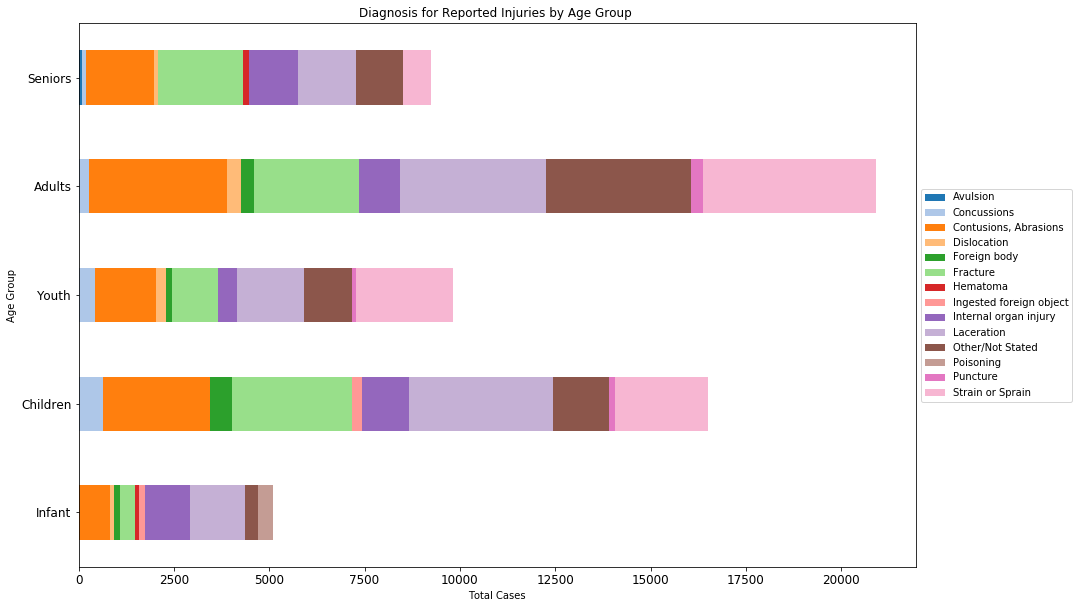

In [30]:
# Prepare data to visualize by diagnosis and age group 

neiss_2014['cases'] = 1

# group by age group and diagnosis and get total count of cases for each combination 

by_age_group_diagnosis = neiss_2014.groupby(['age_group', "diagnosis_name"], as_index=False).cases.sum()

# sort by total cases 
by_age_group_diagnosis = by_age_group_diagnosis.sort_values(['age_group','cases'],ascending=False)\
                            .groupby('age_group').head(10)

# pivot the data to plot stacked bar chart 
age_group_pivoted = by_age_group_diagnosis.pivot(index='age_group', columns='diagnosis_name', values='cases')


# tableau 20 color scale 
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)


# horizontal stacked bar chart    
age_group_pivoted.plot.barh(stacked = True, color = tableau20, figsize=(15,10))

# slightly increase size of font 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

# set axis label and title 
plt.title('Diagnosis for Reported Injuries by Age Group ')
plt.ylabel('Age Group')
plt.xlabel('Total Cases')

# make sure legend is on side of the bar not over them 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# show the visualization 
plt.show()

###  Visualizing Age Group and Affected Body Parts

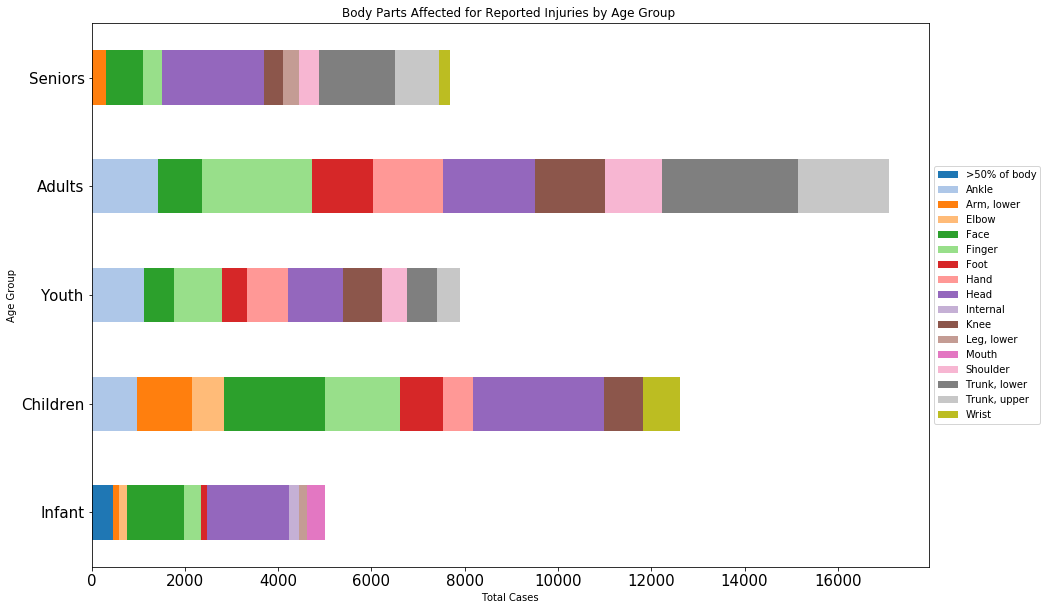

In [31]:
# group by age group and diagnosis and get total count of cases for each combination 

by_age_group_body_parts = neiss_2014.groupby(['age_group', "body_part_name"], as_index=False).cases.sum()

# sort by total cases 
by_age_group_body_parts = by_age_group_body_parts.sort_values(['age_group','cases'],ascending=False).\
                         groupby('age_group').head(10)

# pivot the data to plot stacked bar chart 
age_bp_pivoted = by_age_group_body_parts.pivot(index='age_group', columns='body_part_name', values='cases')


# horizontal stacked bar chart    
age_bp_pivoted.plot.barh(stacked = True, color = tableau20, figsize=(15,10))

# slightly increase size of font 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

# set axis label and title 
plt.title('Body Parts Affected for Reported Injuries by Age Group ')
plt.ylabel('Age Group')
plt.xlabel('Total Cases')

# make sure legend is on side of the bar not over them 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# show the visualization 
plt.show()

<p> From the above visualization we can infer that children and infants are most likey to get hurt in <b> face </b>  compared to adults and seniors </p>


### Question 5+
#### Investigate the data however you like and discuss any interesting insights you can find in the data

I used Tableau to visually explore patterns and derive some insights. Please click the link to view relevant dashboard and story boards. 

https://public.tableau.com/profile/jansi8320#!/vizhome/NEISSVisualExploration/DiagnosisByRace 

